In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely.geometry
import seaborn as sns
import plotly.express as px
import re
from matplotlib.colors import TwoSlopeNorm
import missingno as msno
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import math

In [2]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pd.set_option('display.max_columns', None)

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200

In [4]:
# Projected Coordinate System: how you project onto a 2D plane
epsg_2d = 26717 
# Toronto Police Service Open Data includes geographic location information provided in
# the projected coordinate system NAD 1927 UTM 17N
# https://epsg.io/26717

# Geographic Coordinate System: how coordinates are represented in a 3D space
# World Geodetic System 1984 (WGS84)
# https://epsg.io/4326
epsg_3d = 4326 

In [5]:
stations_point = gpd.read_file('./clean_data/stations_point.geojson')
stations_area = gpd.read_file('./clean_data/stations_area.geojson')

# Import major crime indicators

















































































































































































































In [6]:
# geojson format is too big -> use csv instead
mci_select = pd.read_csv('./clean_data/mci_select.csv')
mci_select['geometry'] = mci_select.apply(lambda x: shapely.geometry.Point(x['Long'], x['Lat']), axis=1)
mci_select = gpd.GeoDataFrame(mci_select, crs='epsg:' + str(epsg_3d), geometry='geometry')

C:\Users\willi\AppData\Local\Temp\ipykernel_10676\3369891977.py:2: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\willi\miniconda3\envs\police\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [7]:
mci_select

X             Y  Index_ event_unique_id Division  \
0      -8.859955e+06  5.424372e+06     110  GO-20141625305      D23   
1      -8.859522e+06  5.418688e+06     438  GO-20141297201      D23   
2      -8.859354e+06  5.415799e+06     542  GO-20141302953      D23   
3      -8.863263e+06  5.422674e+06     546  GO-20141304312      D23   
4      -8.859354e+06  5.415799e+06     593  GO-20141303907      D23   
...              ...           ...     ...             ...      ...   
280664 -8.859224e+06  5.426345e+06    1366   GO-2020898005      D23   
280665 -8.830322e+06  5.431112e+06    1367   GO-2020915335      D42   
280666 -8.822707e+06  5.425298e+06    1368   GO-2020909524      D41   
280667 -8.837879e+06  5.410726e+06    1369   GO-2020971451      D52   
280668 -8.860228e+06  5.425153e+06    1370   GO-2020993900      D23   

                   occurrencedate  occurrenceyear occurrencemonth  \
0       2014-03-02 05:00:00+00:00            2014           March   
1       2014-01-03 05:00:00+00:00            2014         January   
2       2014-01-08 05:00:00+00:00            2014         January   
3       2014-01-08 05:00:00+00:00            2014         January   
4       2014-01-06 05:00:00+00:00            2014         January   
...                           ...             ...             ...   
280664  2020-05-14 04:00:00+00:00            2020             May   
280665  2020-05-17 04:00:00+00:00            2020             May   
280666  2020-05-19 04:00:00+00:00            2020             May   
280667  2020-05-26 04:00:00+00:00            2020             May   
280668  2020-05-30 04:00:00+00:00            2020             May   

        occurrenceday  occurrencedayofyear occurrencedayofweek  \
0                   2                   61              Sunday   
1                   3                    3              Friday   
2                   8                    8           Wednesday   
3                   8                    8           Wednesday   
4                   6                    6              Monday   
...               ...                  ...                 ...   
280664             14                  135            Thursday   
280665             17                  138              Sunday   
280666             19                  140             Tuesday   
280667             26                  147             Tuesday   
280668             30                  151            Saturday   

                    MCI Hood_ID                      Neighbourhood       Long  \
0               Assault       1             West Humber-Clairville -79.590332   
1       Break and Enter       1             West Humber-Clairville -79.586443   
2            Theft Over       1             West Humber-Clairville -79.584931   
3       Break and Enter       1             West Humber-Clairville -79.620043   
4            Theft Over       1             West Humber-Clairville -79.584931   
...                 ...     ...                                ...        ...   
280664         Homicide       2  Mount Olive-Silverstone-Jamestown -79.583768   
280665         Homicide      46                      Pleasant View -79.324129   
280666         Homicide     138                      Eglinton East -79.255724   
280667         Homicide      77  Waterfront Communities-The Island -79.392021   
280668         Homicide       1             West Humber-Clairville -79.592783   

              Lat  ObjectId                    geometry  
0       43.734013         1  POINT (-79.59033 43.73401)  
1       43.697108         5  POINT (-79.58644 43.69711)  
2       43.678342         6  POINT (-79.58493 43.67834)  
3       43.722990         7  POINT (-79.62004 43.72299)  
4       43.678342         8  POINT (-79.58493 43.67834)  
...           ...       ...                         ...  
280664  43.746816      1248  POINT (-79.58377 43.74682)  
280665  43.777743      1249  POINT (-79.32413 43.77774)  
280666  43.740025      1250  POINT (-79.25572 43.

In [8]:
mci_select.MCI.unique()

array(['Assault', 'Break and Enter', 'Theft Over', 'Robbery',
       'Auto Theft', 'Shootings', 'Homicide'], dtype=object)

In [9]:
mci_select.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'MCI', 'Hood_ID',
       'Neighbourhood', 'Long', 'Lat', 'ObjectId', 'geometry'],
      dtype='object')

In [10]:
mci_select.replace({'occurrencemonth': {'January': 'Jan', 
                                        'February': 'Feb', 
                                        'March': 'Mar', 
                                        'April': 'Apr', 
                                        'May': 'May', 
                                        'June': 'Jun', 
                                        'July': 'Jul', 
                                        'August': 'Aug', 
                                        'September': 'Sep', 
                                        'October': 'Oct', 
                                        'November': 'Nov', 
                                        'December': 'Dec'},
                    'occurrencedayofweek': {'Monday': "Mon", 
                                            'Tuesday': "Tue", 
                                            'Wednesday': "Wed", 
                                            'Thursday': "Thu", 
                                            'Friday': "Fri", 
                                            'Saturday': "Sat", 
                                            'Sunday': "Sun"}}, inplace=True)

Text(0.5, 0.98, 'Number of crimes by time period in City of Toronto')

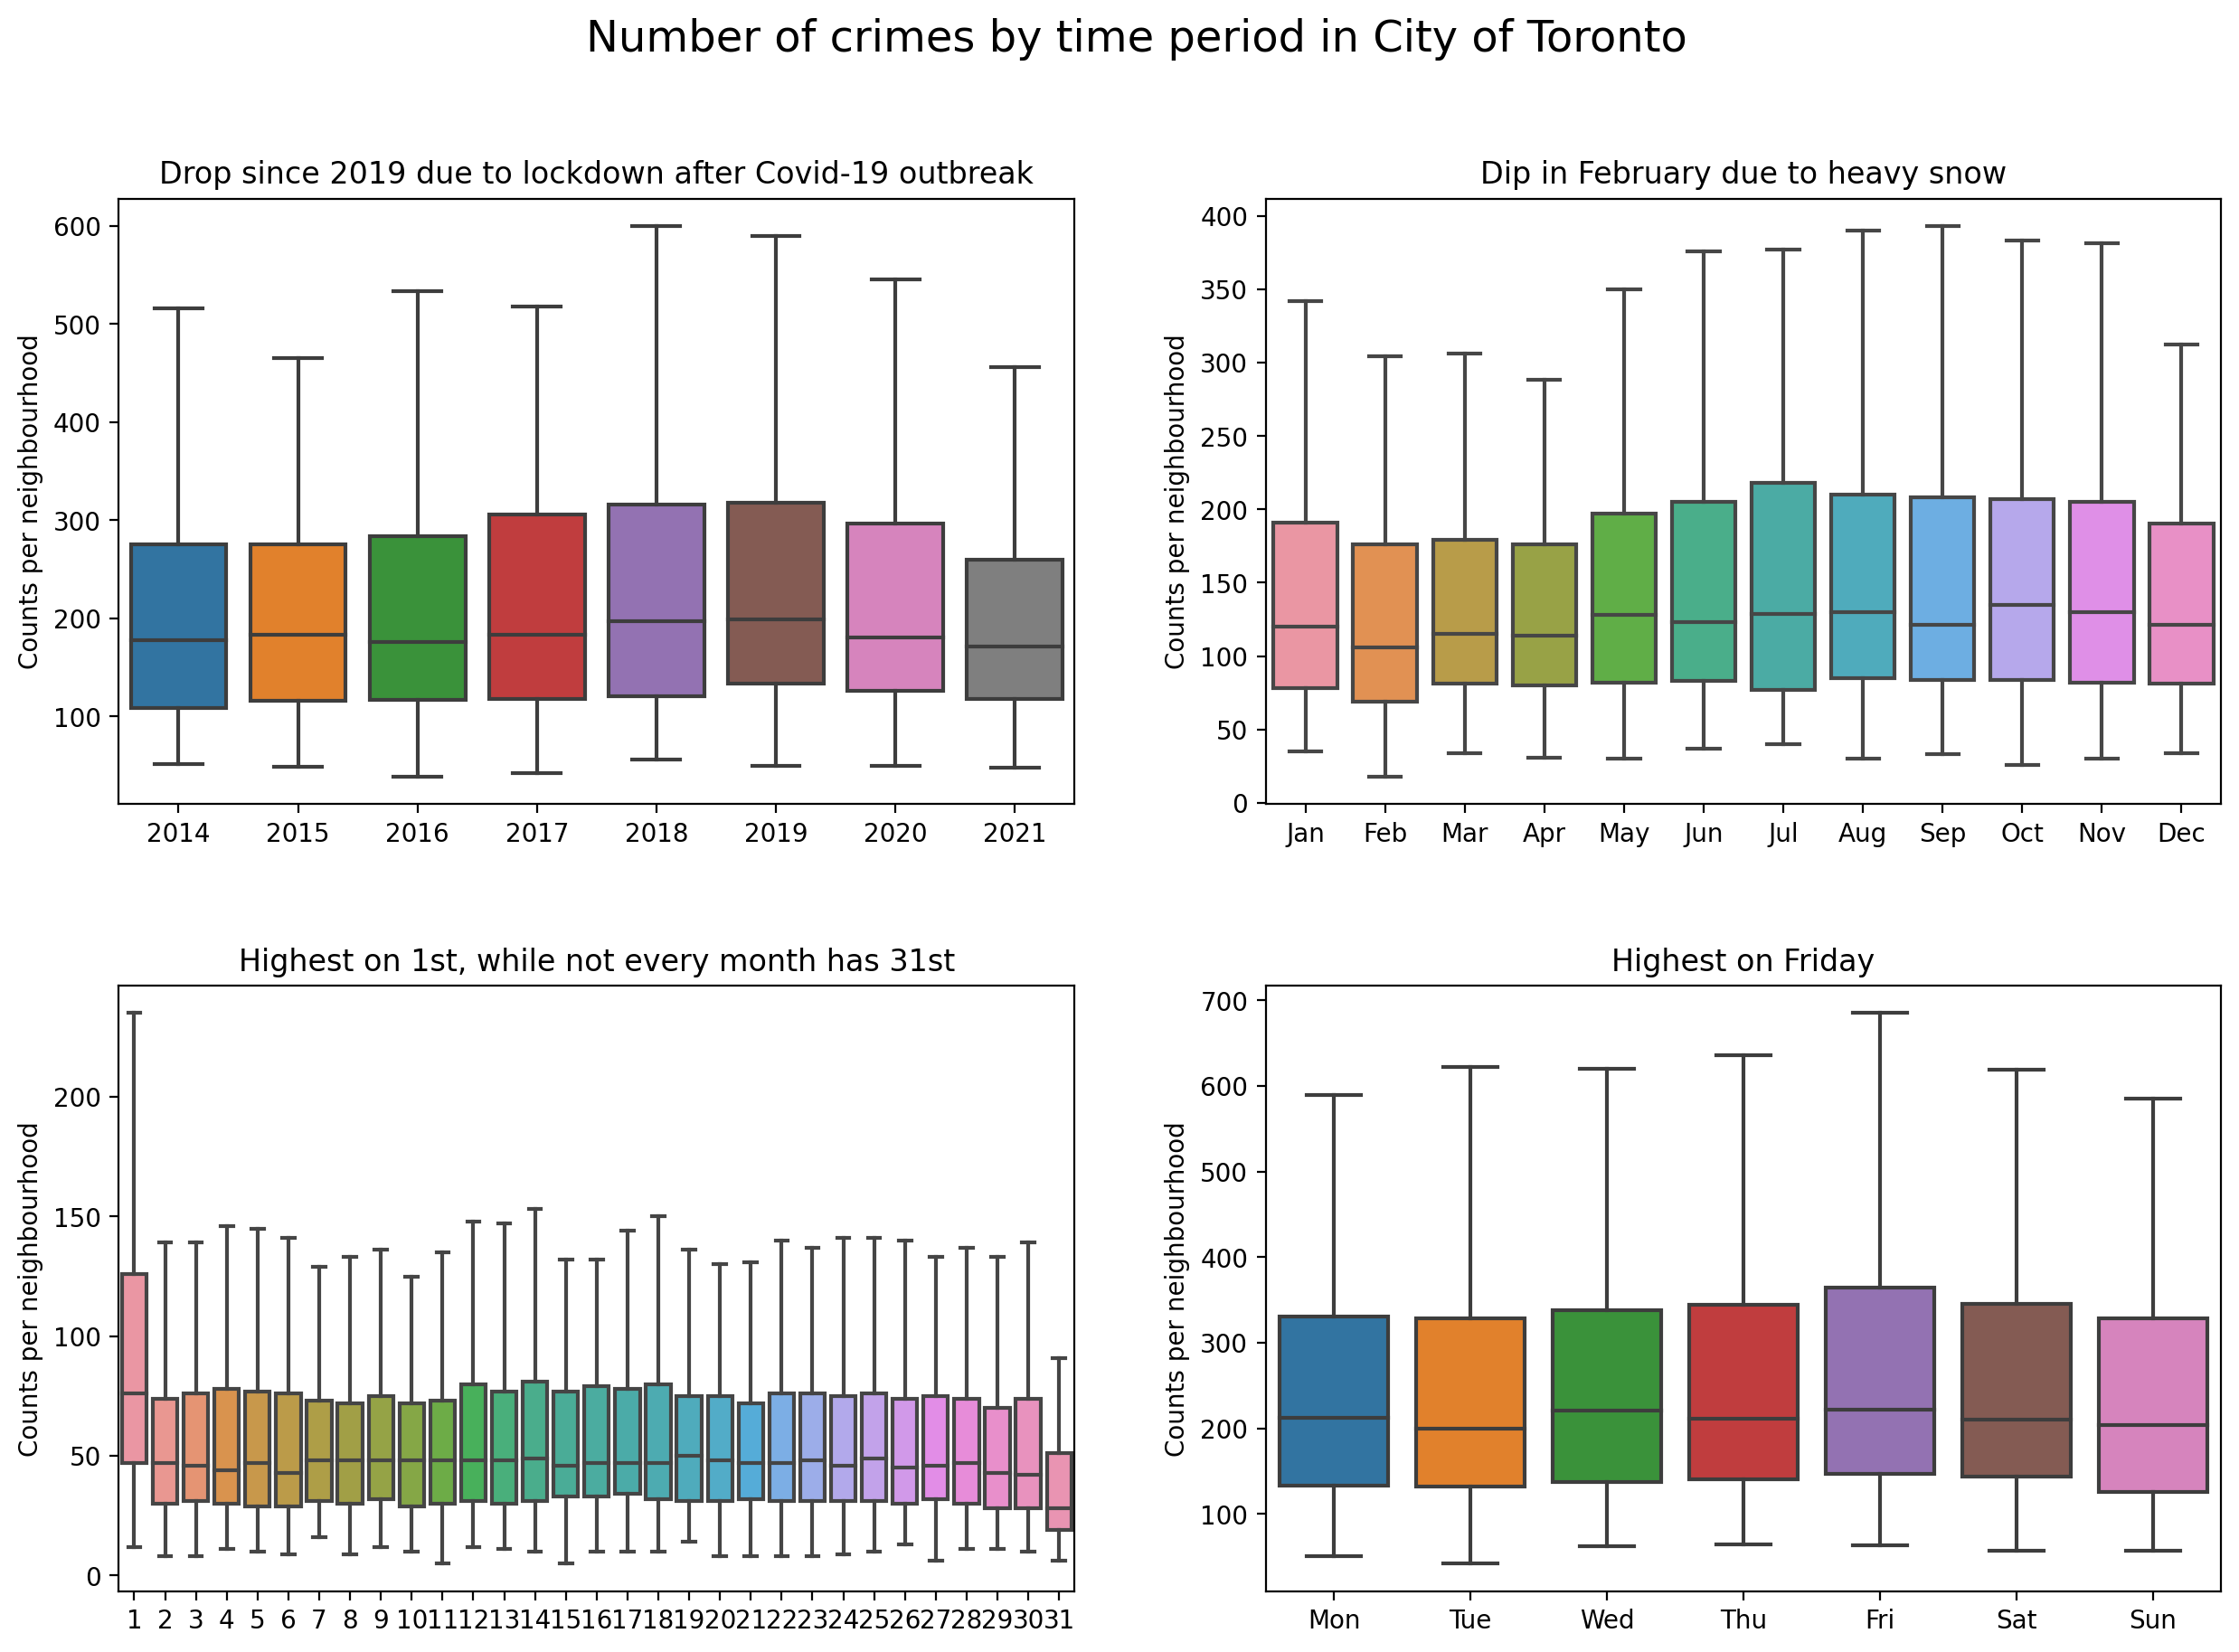

In [11]:
vars = ['occurrenceyear', 
        'occurrencemonth', 
        'occurrenceday',
        'occurrencedayofweek']
vars_cat = [[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            np.arange(1,32,1),
            ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
            ]
titles = ['Drop since 2019 due to lockdown after Covid-19 outbreak',
         'Dip in February due to heavy snow',
         'Highest on 1st, while not every month has 31st',
         'Highest on Friday']

fig, axes = plt.subplots(int(len(vars)/2),2)
plt.subplots_adjust(hspace=0.3)
for var, var_cat, title, ax in zip(vars, vars_cat, titles, axes.flatten()):    
    mci_select[var] = mci_select[var].astype('category').cat.set_categories(var_cat)
    sns.boxplot(data = mci_select.groupby(['Neighbourhood', var]).size().reset_index(name='count'), 
                x = var,
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(title)

fig.suptitle('Number of crimes by time period in City of Toronto', size='xx-large')

Text(0.5, 0.98, 'Number of crimes by type in Toronto neighbourhoods')

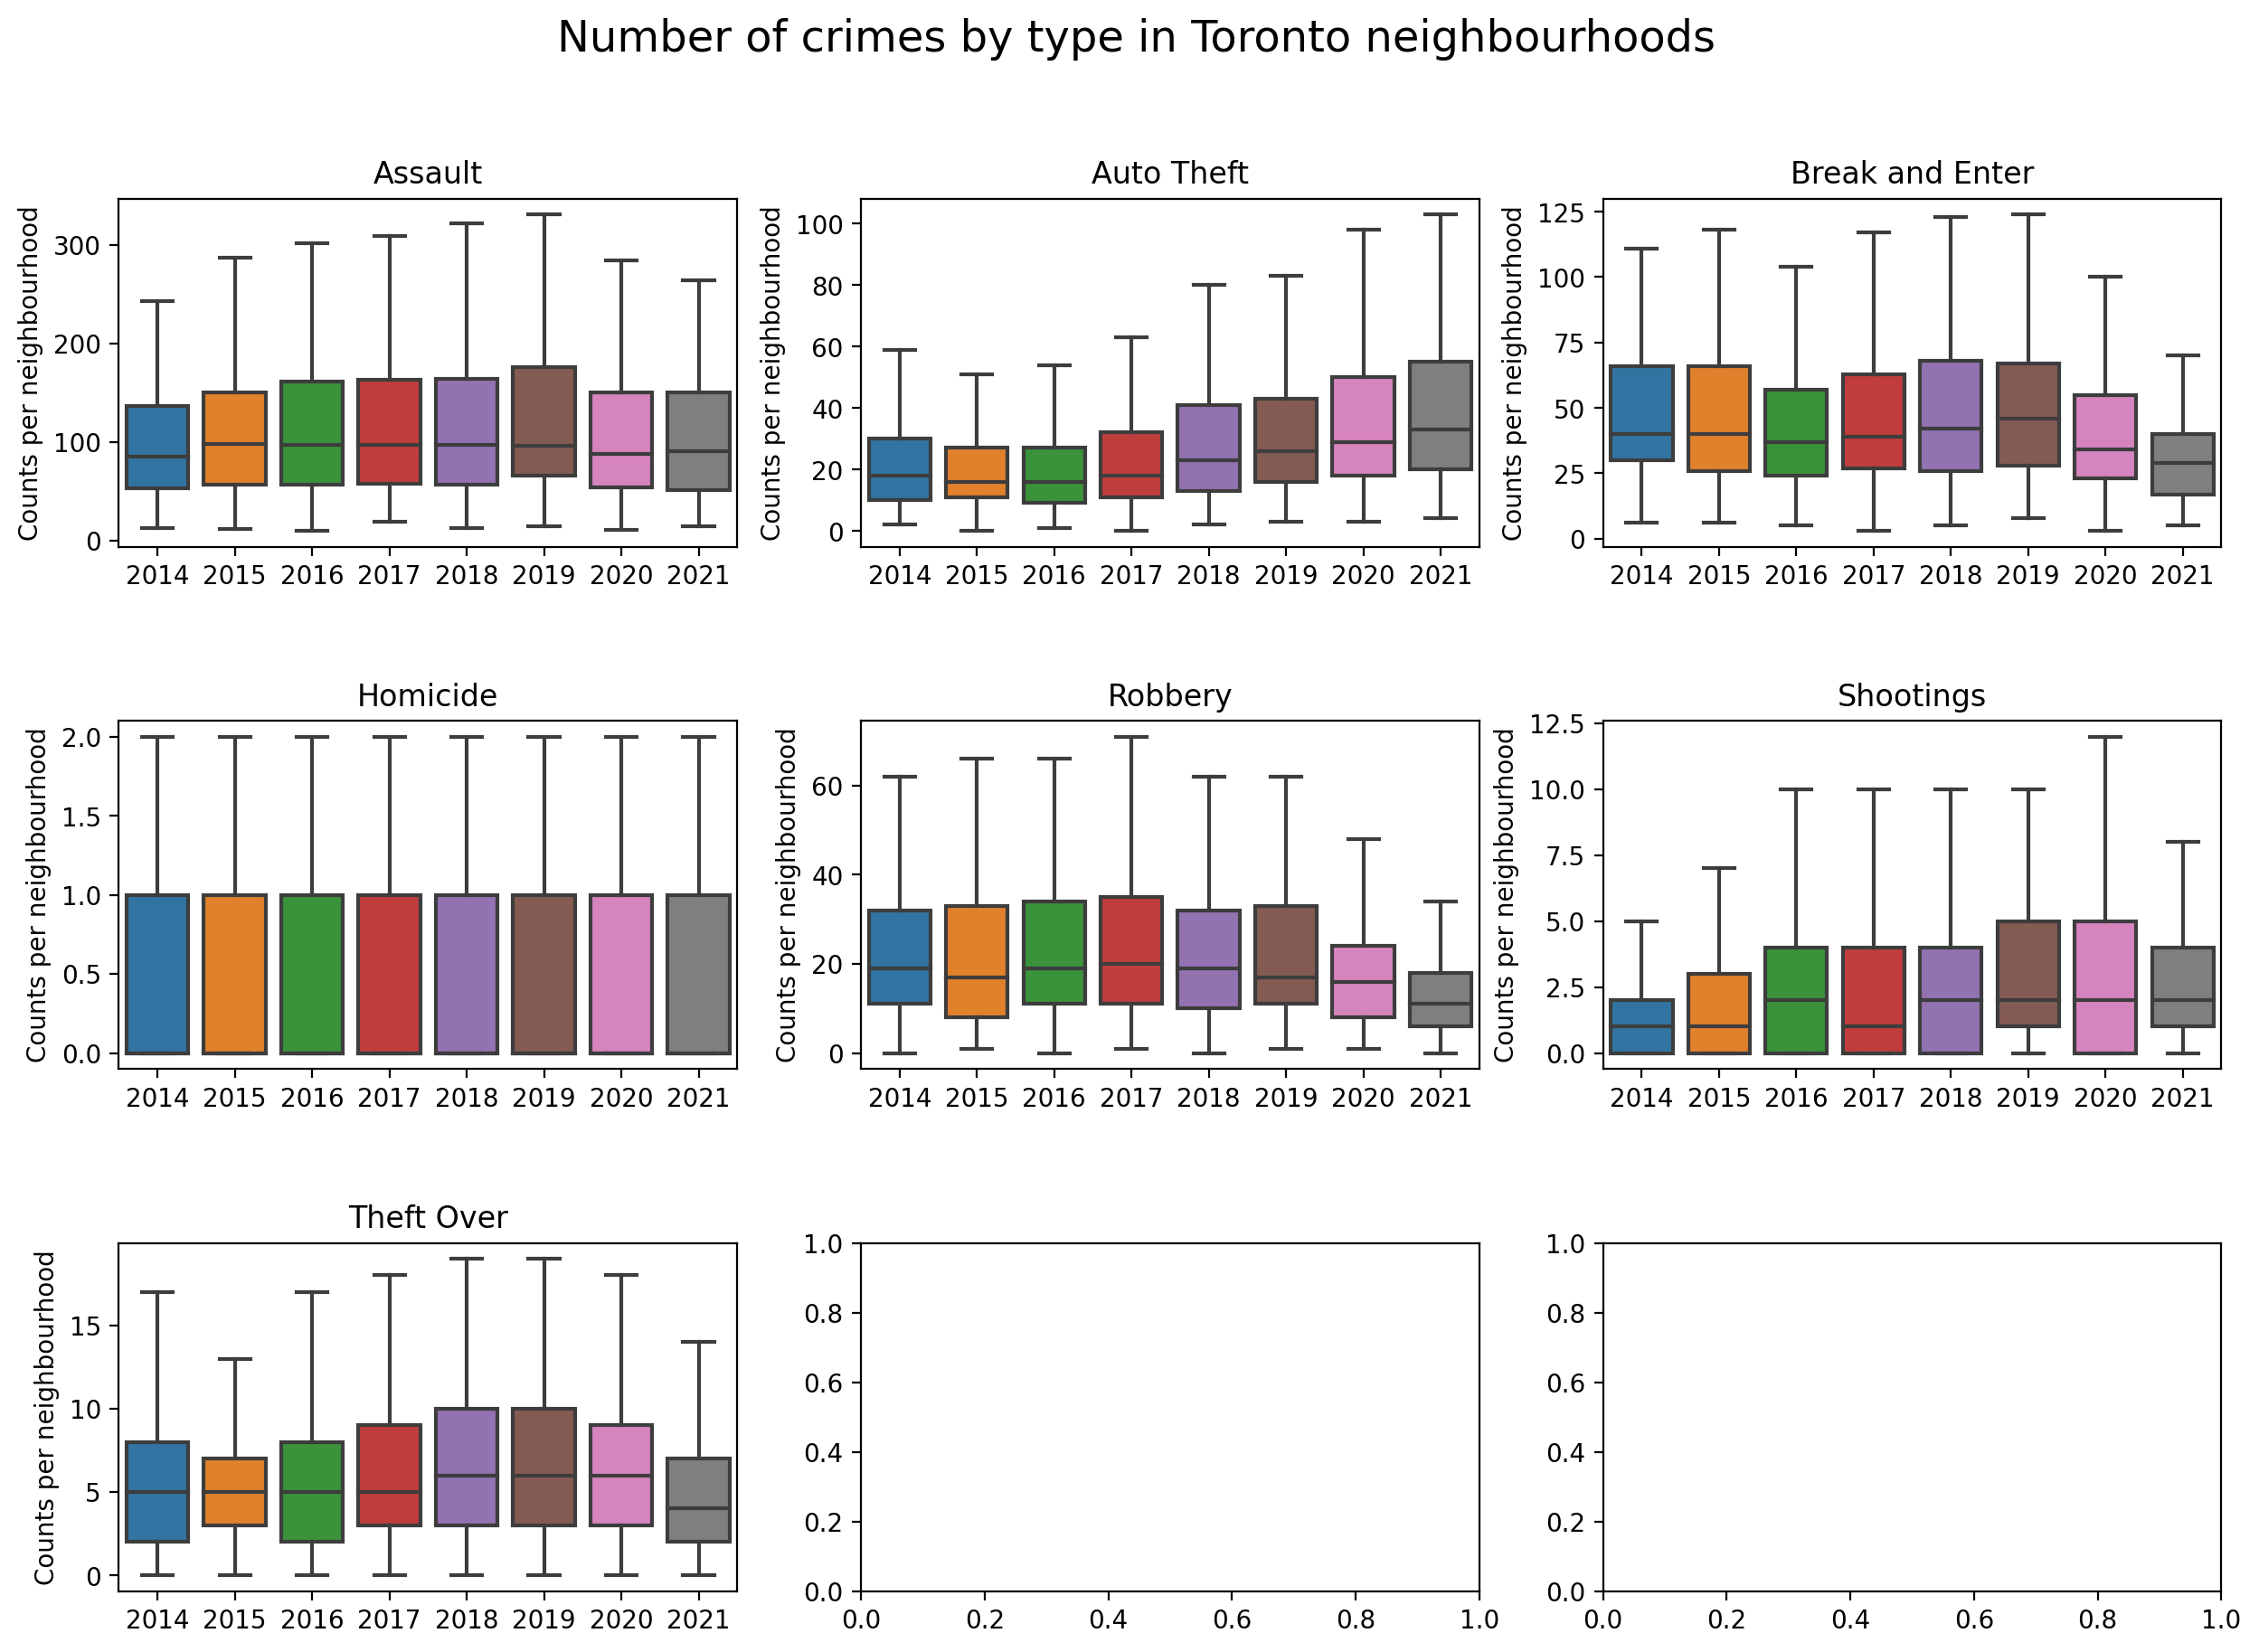

In [12]:
vars = sorted(mci_select.MCI.unique())
fig, axes = plt.subplots(int(math.ceil(len(vars)/3)),3)
plt.subplots_adjust(hspace=0.5)
for var, ax in zip(vars, axes.flatten()):    
    sns.boxplot(data = mci_select[mci_select.MCI == var].groupby(['Neighbourhood', 'occurrenceyear']).size().reset_index(name='count'), 
                x = 'occurrenceyear',
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(f"{var}")

fig.suptitle('Number of crimes by type in Toronto neighbourhoods', size='xx-large')

## Neighbourhood crime rate and density

In [13]:
neighbourhoods_crime = gpd.read_file('./clean_data/neighbourhoods_crime.geojson')
neighbourhoods_crime

Neighbourhood Hood_ID district  distance_km  \
0                         Yonge-St.Clair      97      C02     2.791462   
1                York University Heights      27      W05    13.676191   
2                       Lansing-Westgate      38      C07    10.427749   
3                     Yorkdale-Glen Park      31      W04     7.592207   
4                    Stonegate-Queensway      16      W07     9.017845   
..                                   ...     ...      ...          ...   
135                        Pleasant View      46      C15    14.643244   
136                             Wychwood      94      C02     2.864021   
137                   Leaside-Bennington      56      C11     5.149543   
138                 Briar Hill-Belgravia     108      W04     6.111904   
139  Mimico (includes Humber Bay Shores)      17      W06     9.894878   

     Assault_Count2014  Assault_Count2015  Assault_Count2016  \
0                 18.0               24.0               35.0   
1                271.0              294.0              363.0   
2                 41.0               81.0               69.0   
3                105.0              133.0              179.0   
4                 90.0               72.0               78.0   
..                 ...                ...                ...   
135               32.0               46.0               54.0   
136               54.0               74.0               79.0   
137               39.0               41.0               30.0   
138               80.0               89.0               80.0   
139              206.0              207.0              242.0   

     Assault_Count2017  Assault_Count2018  Assault_Count2019  \
0                 25.0               33.0               33.0   
1                359.0              370.0              372.0   
2                 92.0               70.0               71.0   
3                164.0              174.0              213.0   
4                 99.0               88.0               83.0   
..                 ...                ...                ...   
135               55.0               47.0               49.0   
136               54.0               76.0               67.0   
137               36.0               36.0               32.0   
138               82.0               87.0               81.0   
139              346.0              487.0              331.0   

     Assault_Count2020  Assault_Count2021  Assault_Density2014  \
0                 25.0               48.0            15.499636   
1                346.0              327.0            20.457863   
2                100.0               90.0             7.669074   
3                155.0              159.0            17.388745   
4                104.0               72.0            11.325777   
..                 ...                ...                  ...   
135               43.0               23.0            10.783496   
136               86.0               57.0            32.101250   
137               31.0               49.0             8.150998   
138               81.0               67.0            43.706866   
139              281.0              359.0            29.181838   

     Assault_Density2015  Assault_Density2016  Assault_Density2017  \
0              20.666181            30.138181            21.527272   
1              22.194140            27.402968            27.101007   
2              15.151098            12.906490            17.208654   
3              22.025744            29.643670            27.159564   
4               9.060622             9.815674            12.458355   
..                   ...                  ...                  ...   
135            15.501275            18.197149            18.534134   
136            43.990602            46.962940            32.101250   
137             8.568998             6.269999             7.523998   
138            48.623888            43.706866            44.799538   
139            29.323498            3

In [14]:
crime_type = sorted(list(set([re.search('(\w+)_Rate', x).group(1) for x in neighbourhoods_crime.columns if re.search('(\w+)_Rate', x) is not None])))
crime_type

['Assault',
 'AutoTheft',
 'BreakandEnter',
 'Homicide',
 'MCI',
 'Robbery',
 'Shootings',
 'TheftOver']

In [15]:
# set custom order for display
custom_crime_order = ['MCI','Assault', 'AutoTheft','BreakandEnter','Robbery','TheftOver','Homicide','Shootings']
crime_rate = [x + '_Rate' for x in custom_crime_order]
crime_density = [x + '_Density' for x in custom_crime_order]
crime_years = sorted(list(set([re.search('\d+', x).group(0) for x in neighbourhoods_crime.columns if re.search('\d+', x) is not None])))

In [16]:
def plot_crime(var, title):
    fig, axes = plt.subplots(len(crime_years), len(var))

    for j in range(axes.shape[1]):
        # fix the range for each type of crime so we can compare across years
        vmin, vmax = neighbourhoods_crime[[var[j] + str(year) for year in crime_years]].min().min(), neighbourhoods_crime[[var[j] + str(year) for year in crime_years]].max().max()
        norm = TwoSlopeNorm(vmin=vmin, vcenter= np.mean([vmin, vmax]), vmax=vmax)
        for i in range(axes.shape[0]):  
            neighbourhoods_crime.plot(column = var[j] + str(crime_years[i]), 
                                cmap = 'viridis',
                                norm = norm,
                                ax = axes[i, j])
        
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].set_yticks([])
            if i == 0:
                axes[i,j].set_title(var[j].split("_")[0])
            if j == 0:
                axes[i,j].set_ylabel(crime_years[i], rotation=90, size='large')

    fig.suptitle(title, size='xx-large')

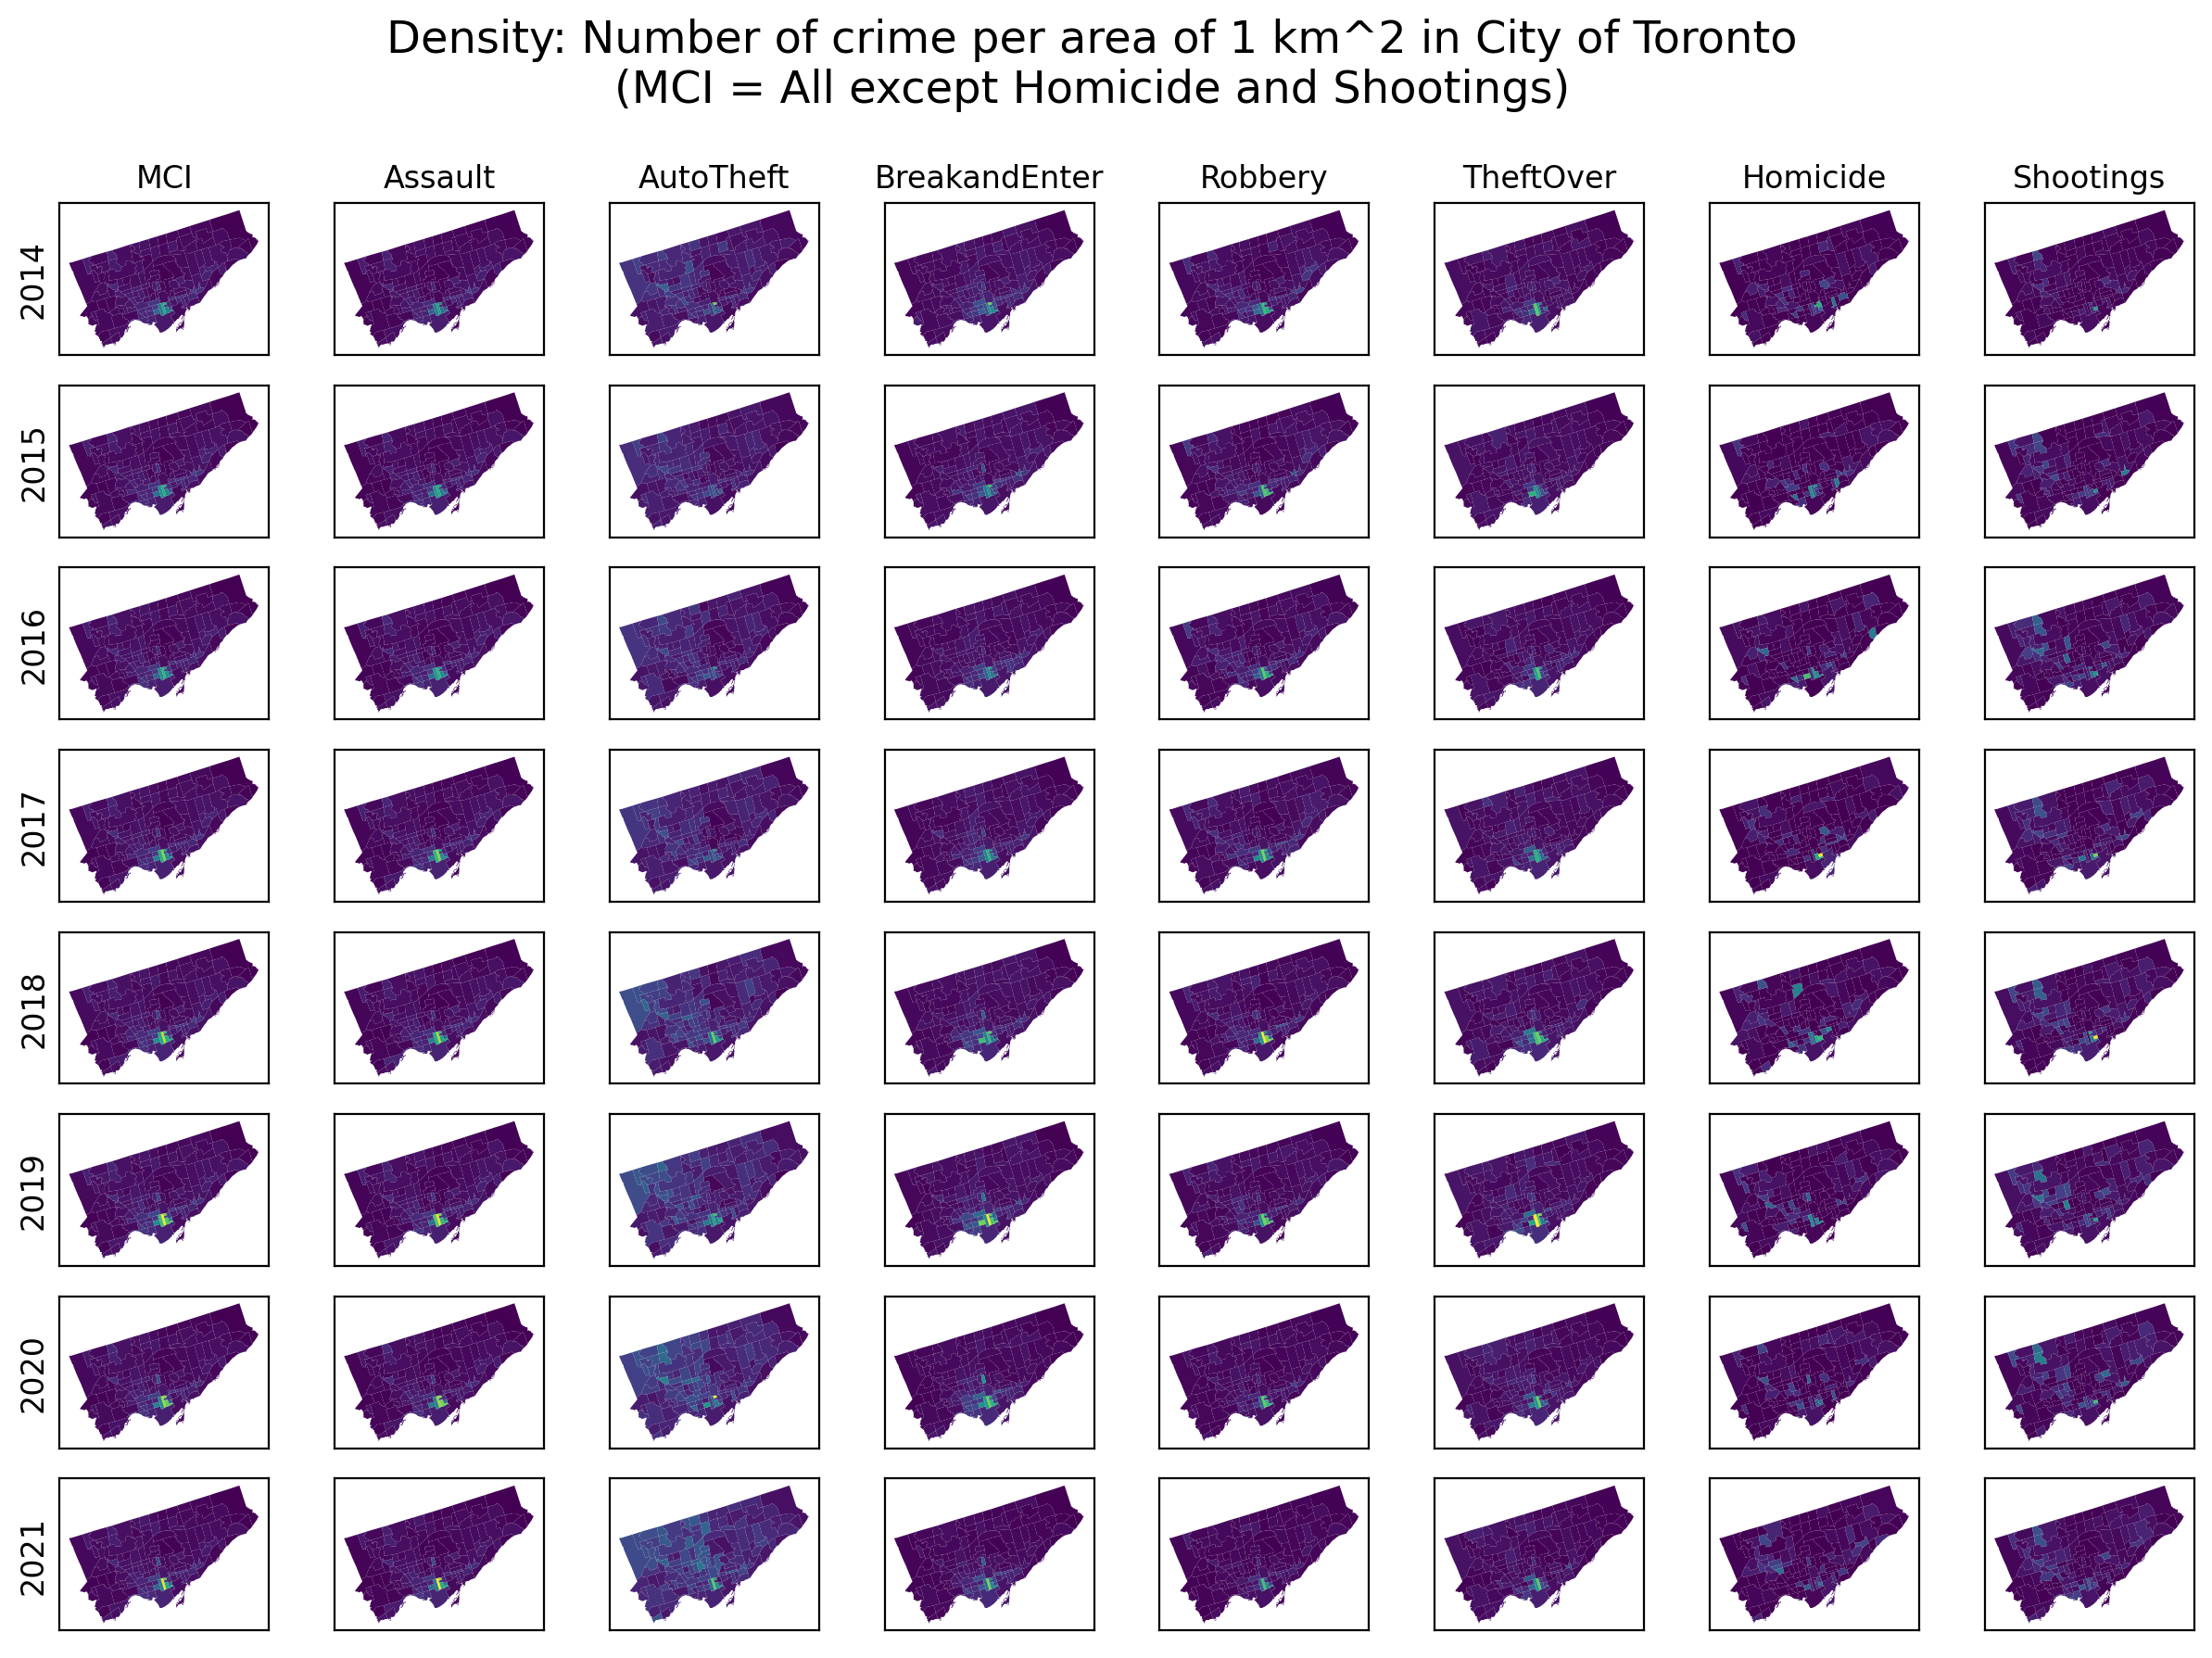

In [17]:
plot_crime(crime_density, 'Density: Number of crime per area of 1 km^2 in City of Toronto\n(MCI = All except Homicide and Shootings)')

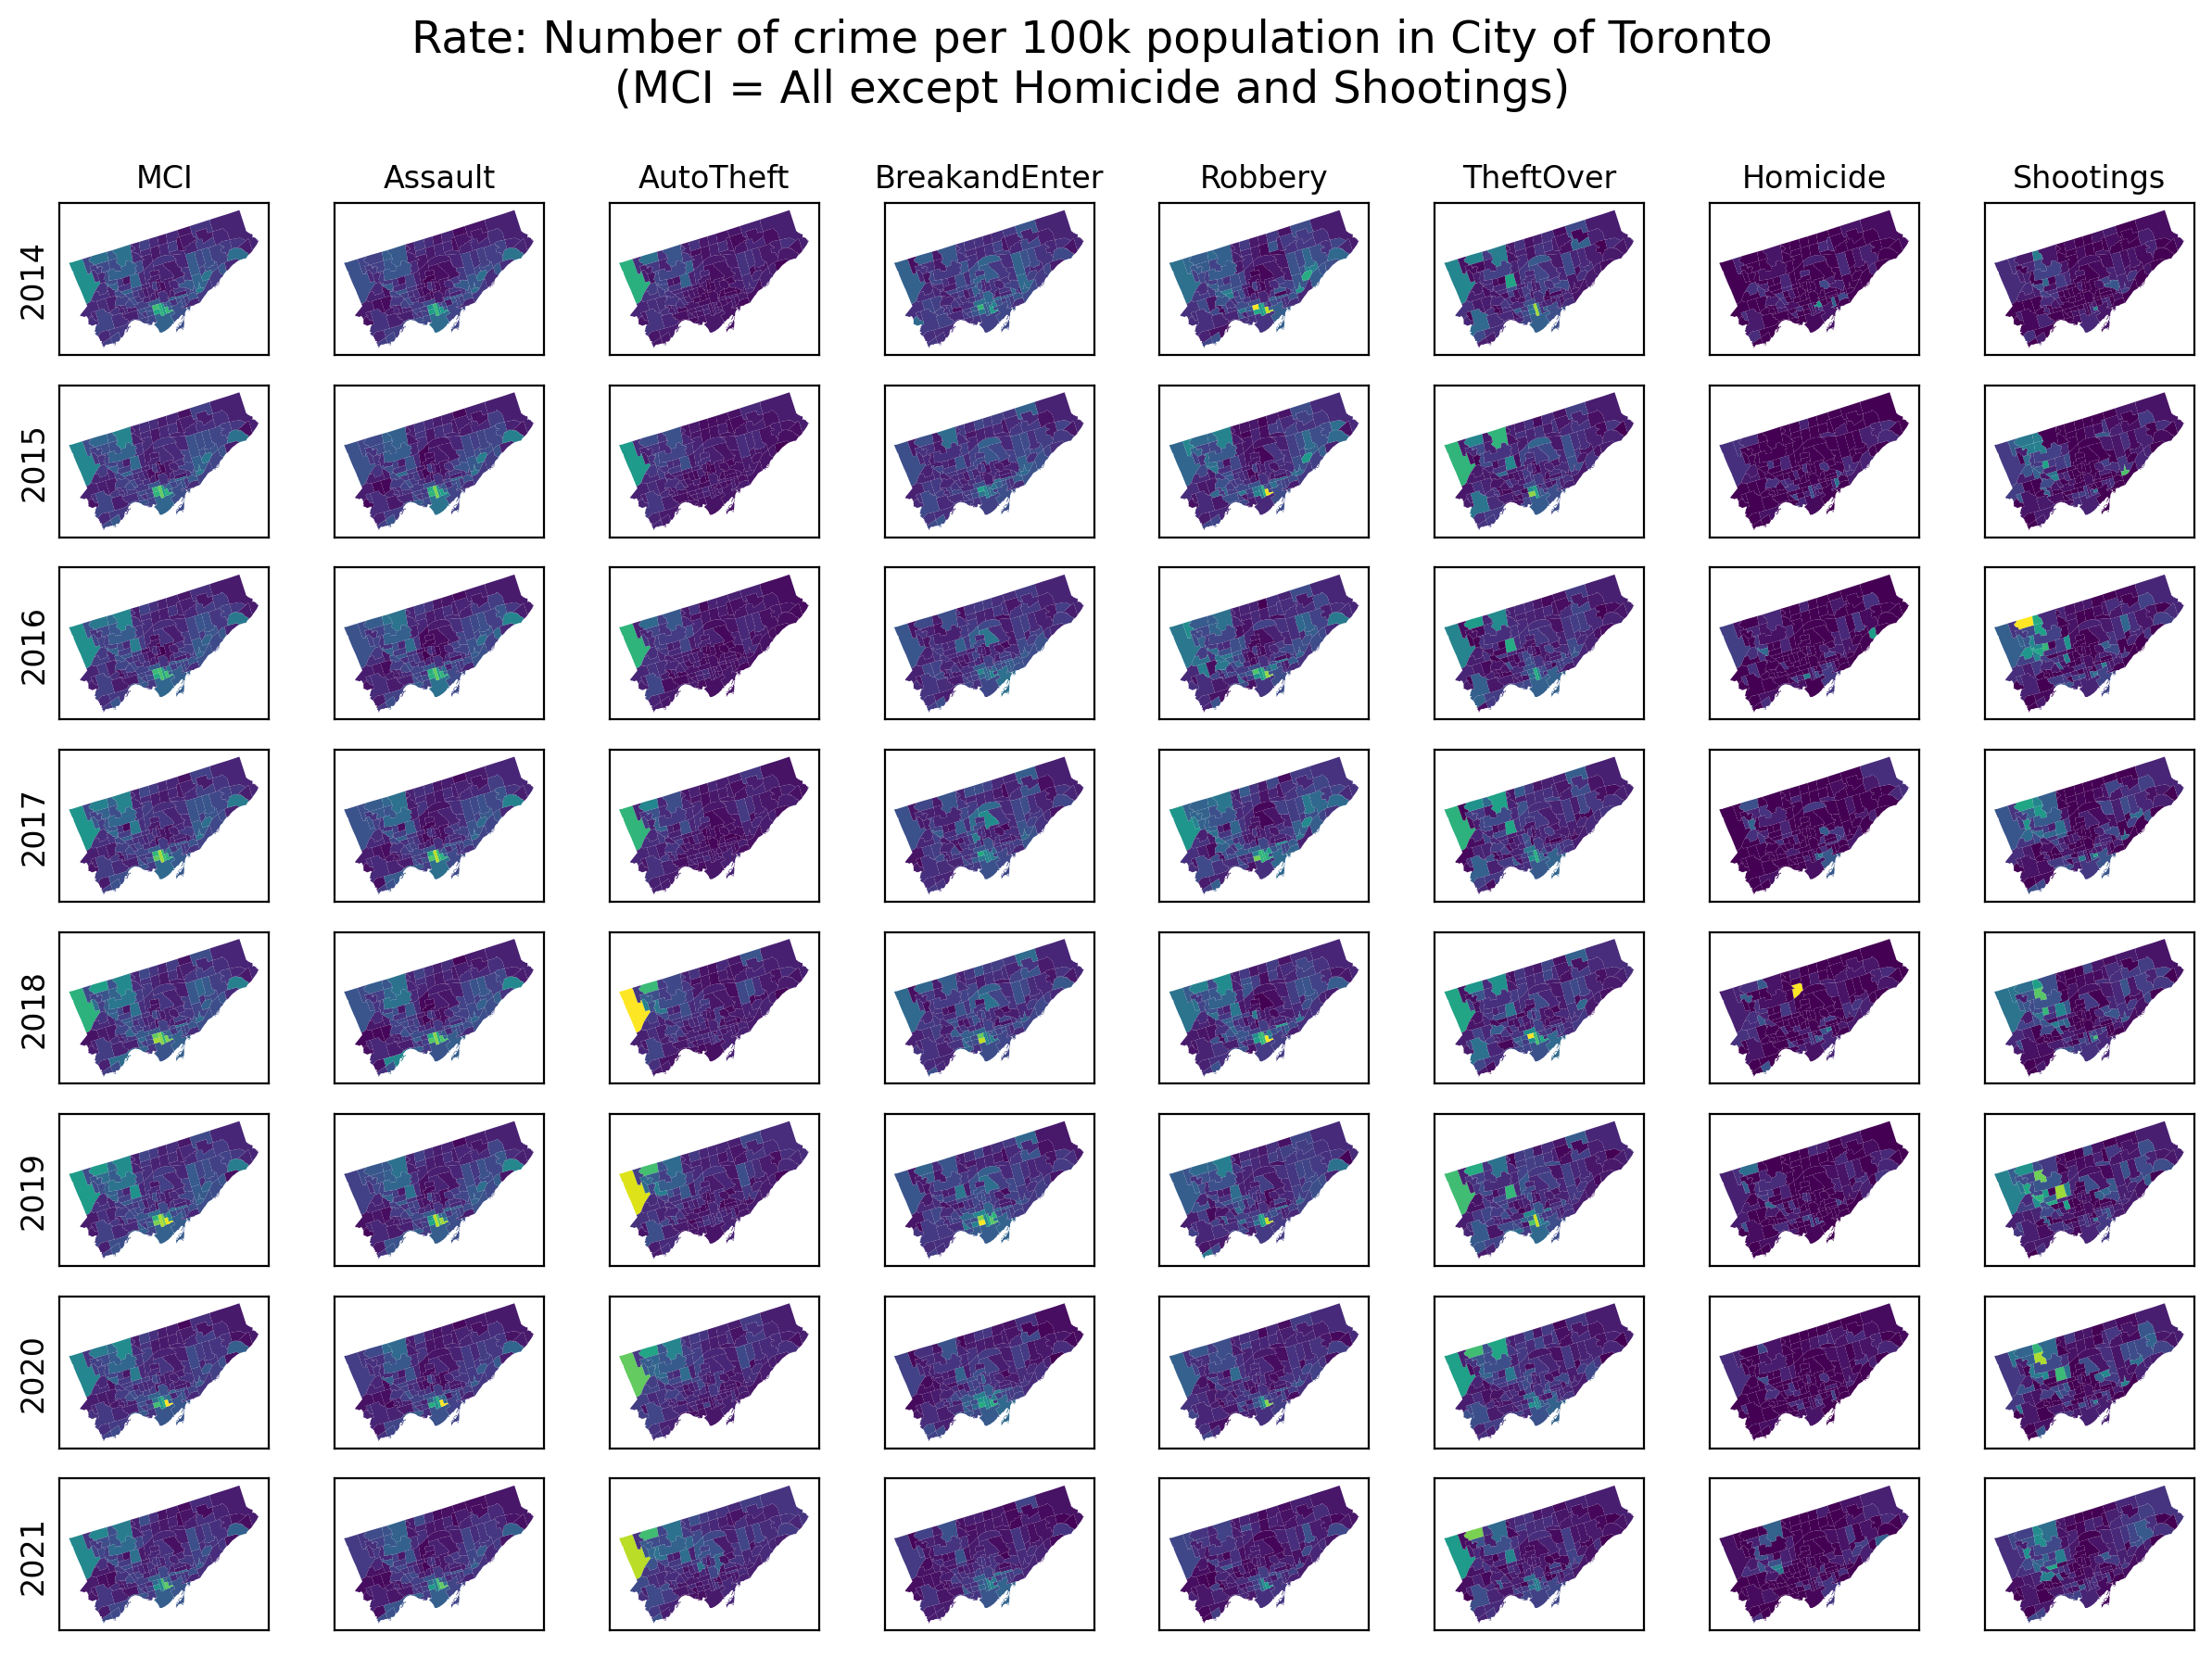

In [18]:
plot_crime(crime_rate, 'Rate: Number of crime per 100k population in City of Toronto\n(MCI = All except Homicide and Shootings)')

In [19]:
# plotly version
# crime_allrate = pd.wide_to_long(neighbourhoods_crime[['Neighbourhood', 'Hood_ID', 'geometry'] + ['All_Rate' + str(year) for year in crime_years]],]], 
#                                   stubnames= "All_Rate", 
#                                   i=['Neighbourhood', 'Hood_ID'], 
#                                   j='year',
#                                   sep='').reset_index()

# crime_allrate.head()

# fig = px.choropleth(crime_allrate, 
#               geojson=crime_allrate.geometry,
#               locations=crime_allrate.index,
#               color = 'All_Rate',
#               animation_frame='year',
#               color_continuous_scale="Viridis",
#               hover_data=['Neighbourhood'])
# fig.update_geos(fitbounds="locations", visible=False)

Text(0.5, 257.52801096780723, 'Longitude')

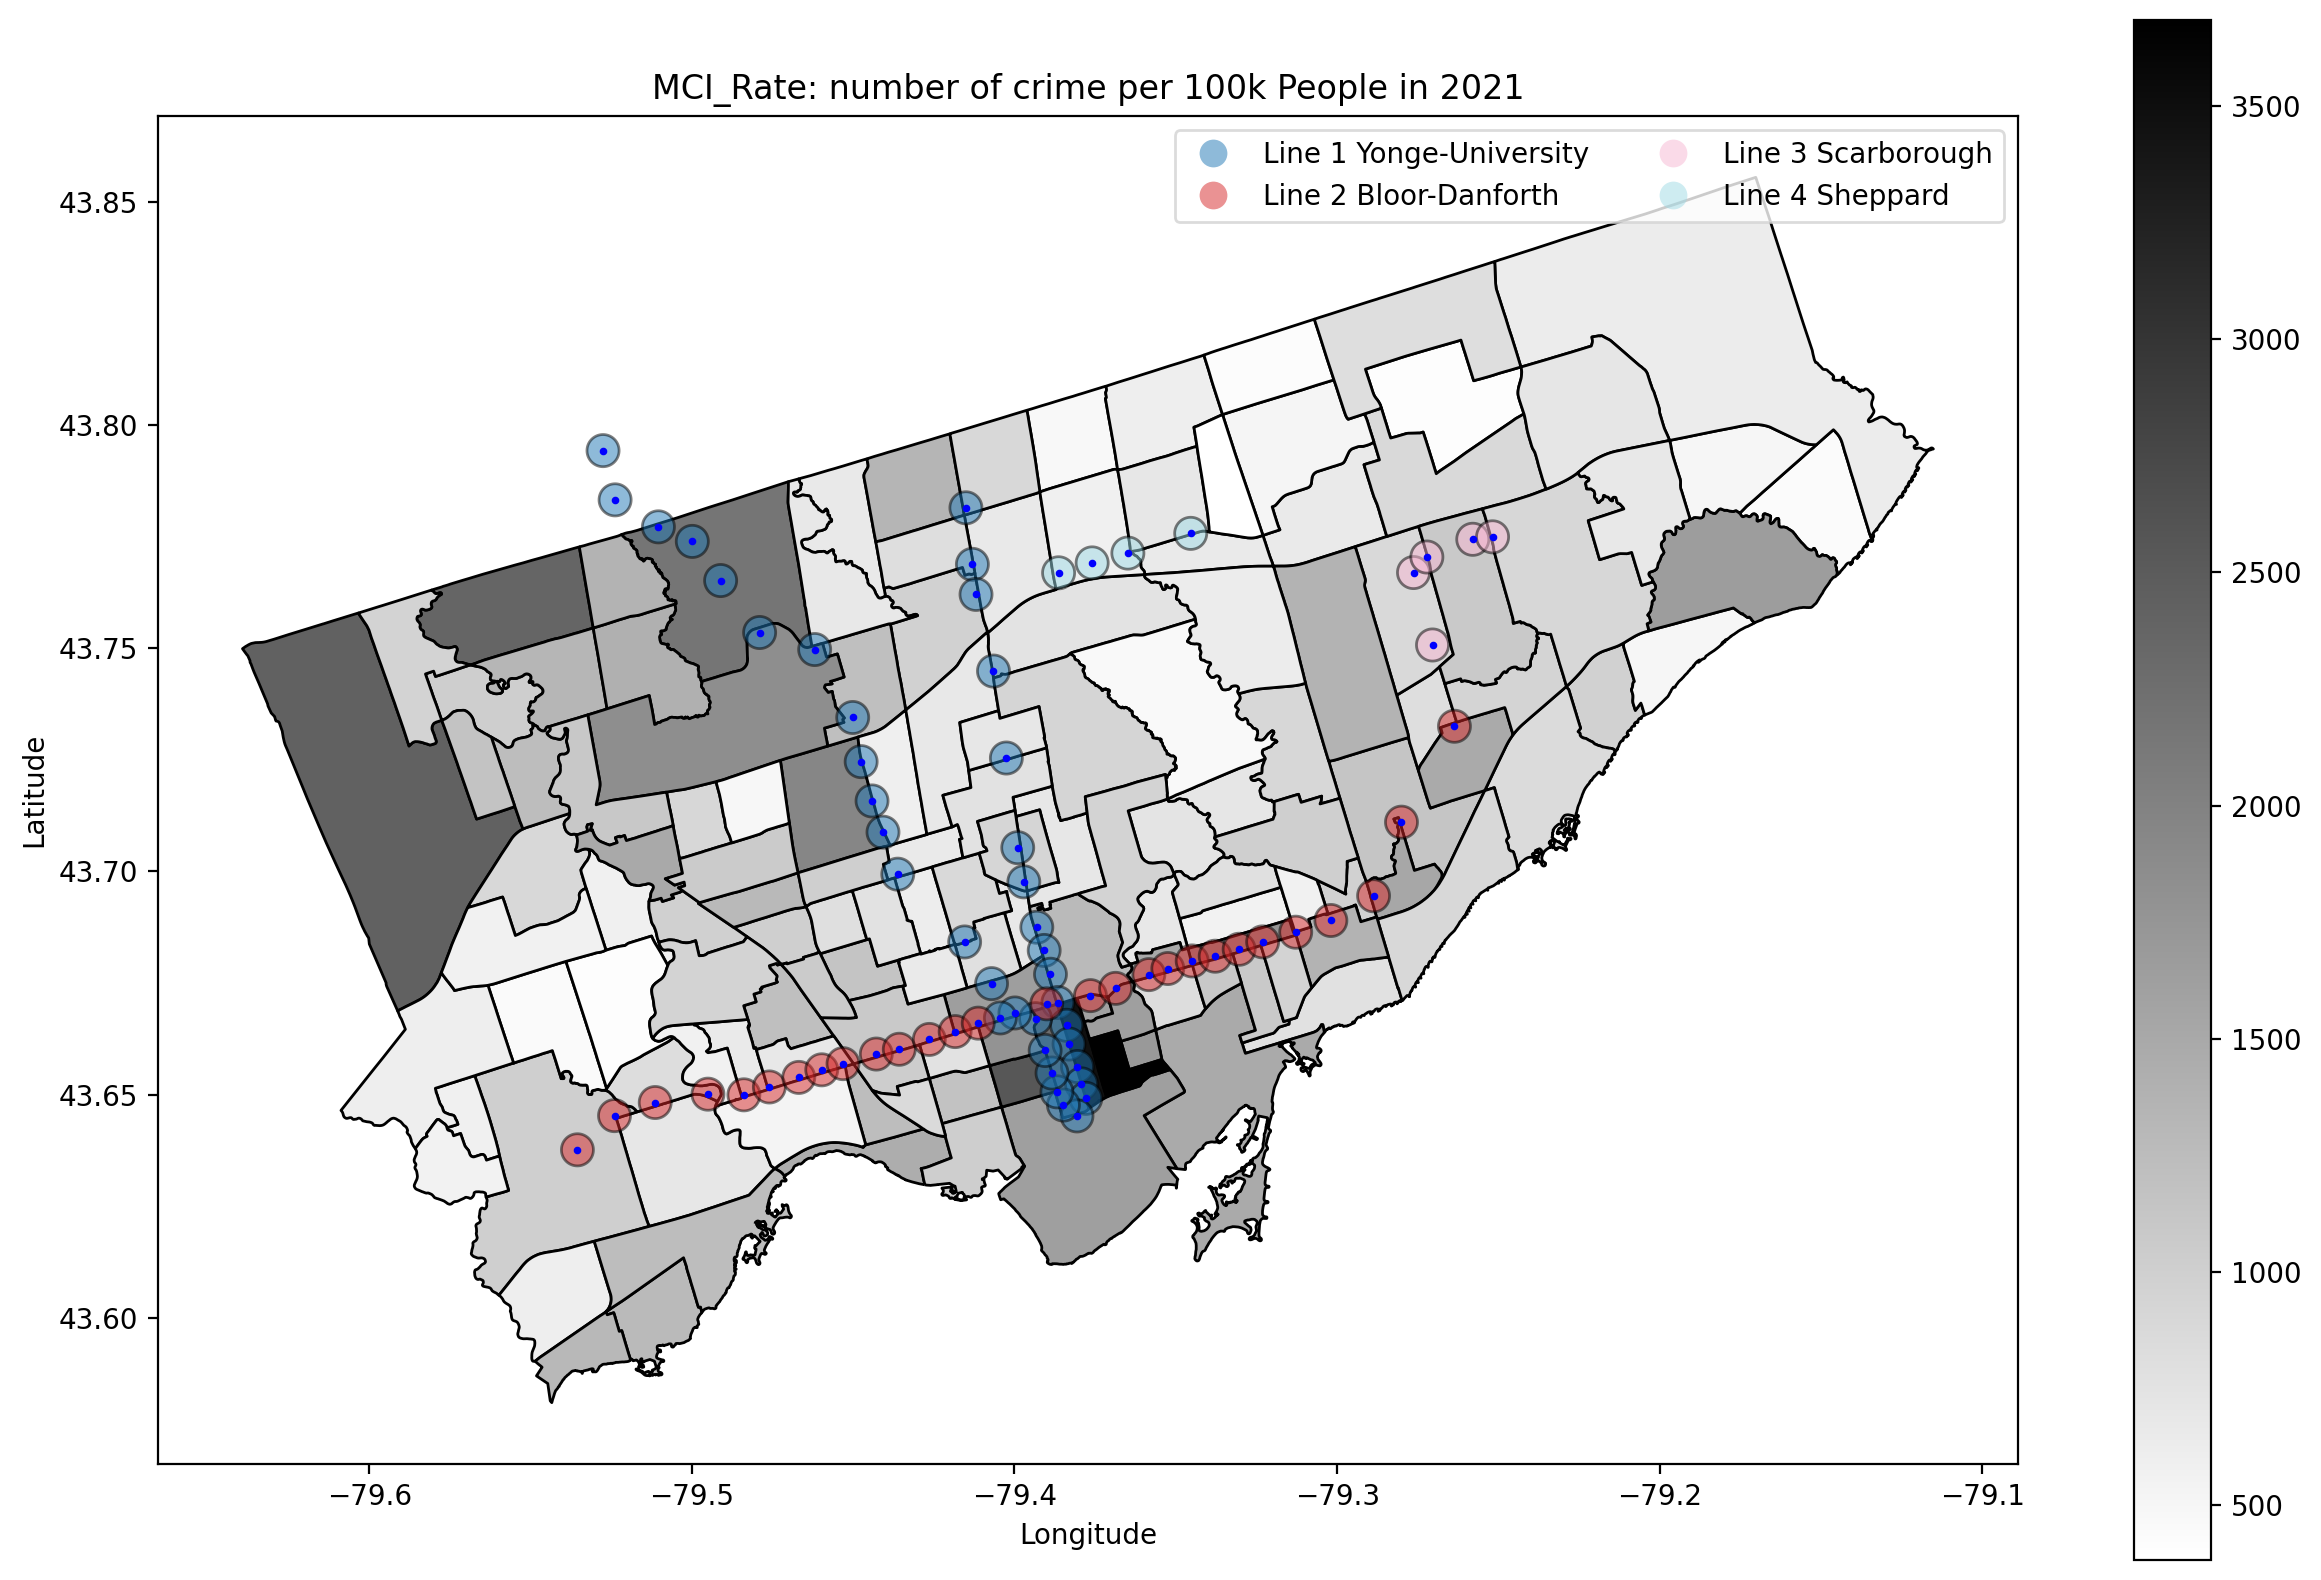

In [20]:
var = "MCI_Rate"
year = 2021
ax = neighbourhoods_crime.plot(column = var + str(year), 
                               edgecolor = 'black',
                               cmap = 'bwr',
                               # norm = norm,
                               legend = True)

stations_area.plot(column = 'line', 
                edgecolor = 'black', 
                alpha = 0.5,
                cmap = 'tab20',
                legend = True,
                legend_kwds = {'loc': 'upper right', 
                                'ncol': 2,
                                'edgecolor': 'lightgrey'},
                ax = ax)
stations_point.plot(ax=ax, 
                    color = 'blue', 
                    markersize = 3)

ax.set_title(var + ": number of crime per 100k People in " + str(year))
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

# Crime around subway stations

In [37]:
crime_around_stations = gpd.sjoin(mci_select, stations_area, predicate='intersects')
crime_around_stations

X             Y  Index_ event_unique_id Division  \
20927  -8.852889e+06  5.411113e+06    4001  GO-20141596187      D22   
20931  -8.852349e+06  5.410811e+06    4356  GO-20141627179      D22   
20937  -8.852349e+06  5.410811e+06    4704  GO-20141657033      D22   
20945  -8.852889e+06  5.411113e+06    4973  GO-20141678745      D22   
20948  -8.852547e+06  5.410747e+06    5098  GO-20141689773      D22   
...              ...           ...     ...             ...      ...   
279958 -8.822314e+06  5.430623e+06    5315  GO-20212463489      D43   
280245 -8.822460e+06  5.430595e+06    1032  GO-20161696689      D43   
280393 -8.822472e+06  5.430176e+06     982   GO-2016139786      D43   
280422 -8.822534e+06  5.430943e+06    1376  GO-20201278229      D43   
277003 -8.853438e+06  5.433740e+06  248684  GO-20143349474      NSA   

                   occurrencedate occurrenceyear occurrencemonth  \
20927   2014-02-25 05:00:00+00:00           2014             Feb   
20931   2014-03-02 05:00:00+00:00           2014             Mar   
20937   2014-03-06 05:00:00+00:00           2014             Mar   
20945   2014-03-11 04:00:00+00:00           2014             Mar   
20948   2014-03-12 04:00:00+00:00           2014             Mar   
...                           ...            ...             ...   
279958  2021-12-22 05:00:00+00:00           2021             Dec   
280245  2016-09-23 04:00:00+00:00           2016             Sep   
280393  2016-01-24 05:00:00+00:00           2016             Jan   
280422  2020-07-10 04:00:00+00:00           2020             Jul   
277003  2014-11-08 05:00:00+00:00           2014             Nov   

       occurrenceday  occurrencedayofyear occurrencedayofweek         MCI  \
20927             25                   56                 Tue     Assault   
20931              2                   61                 Sun     Assault   
20937              6                   65                 Thu     Robbery   
20945             11                   70                 Tue     Robbery   
20948             12                   71                 Wed     Robbery   
...              ...                  ...                 ...         ...   
279958            22                  356                 Wed   Shootings   
280245            23                  267                 Fri    Homicide   
280393            24                   24                 Sun    Homicide   
280422            10                  192                 Fri    Homicide   
277003             8                  312                 Sat  Auto Theft   

       Hood_ID               Neighbourhood       Long        Lat  ObjectId  \
20927       14  Islington-City Centre West -79.526857  43.647887     21012   
20931       14  Islington-City Centre West -79.522003  43.645928     21016   
20937       14  Islington-City Centre West -79.522003  43.645928     21022   
20945       14  Islington-City Centre West -79.526857  43.647887     21030   
20948       14  Islington-City Centre West -79.523779  43.645512     21033   
...        ...                         ...        ...        ...       ...   
279958     127                     Bendale -79.252199  43.774573      5207   
280245     127                     Bendale -79.253509  43.774395       722   
280393     127                     Bendale -79.253612  43.771677       877   
280422     127                     Bendale -79.254174  43.776648      1006   
277003     NSA                         NSA -79.531787  43.794789    281576   

                          geometry  index_right  index  distance_km_order  \
20927   POINT (-79.52686 43.64789)           39     39                 52   
20931   POINT (-79.52200 43.64593)           39     39                 52   
20937   POINT (-79.52200 43.64593)           39     39                 52   
20945   POINT (-79.52686 43.64789)           39     39                 52   
20948   POINT (-79.52378 43.64551)           39     39                 52   
...                      

In [38]:
neighbourhoods = gpd.read_file('./clean_data/neighbourhoods.geojson')

<AxesSubplot:>

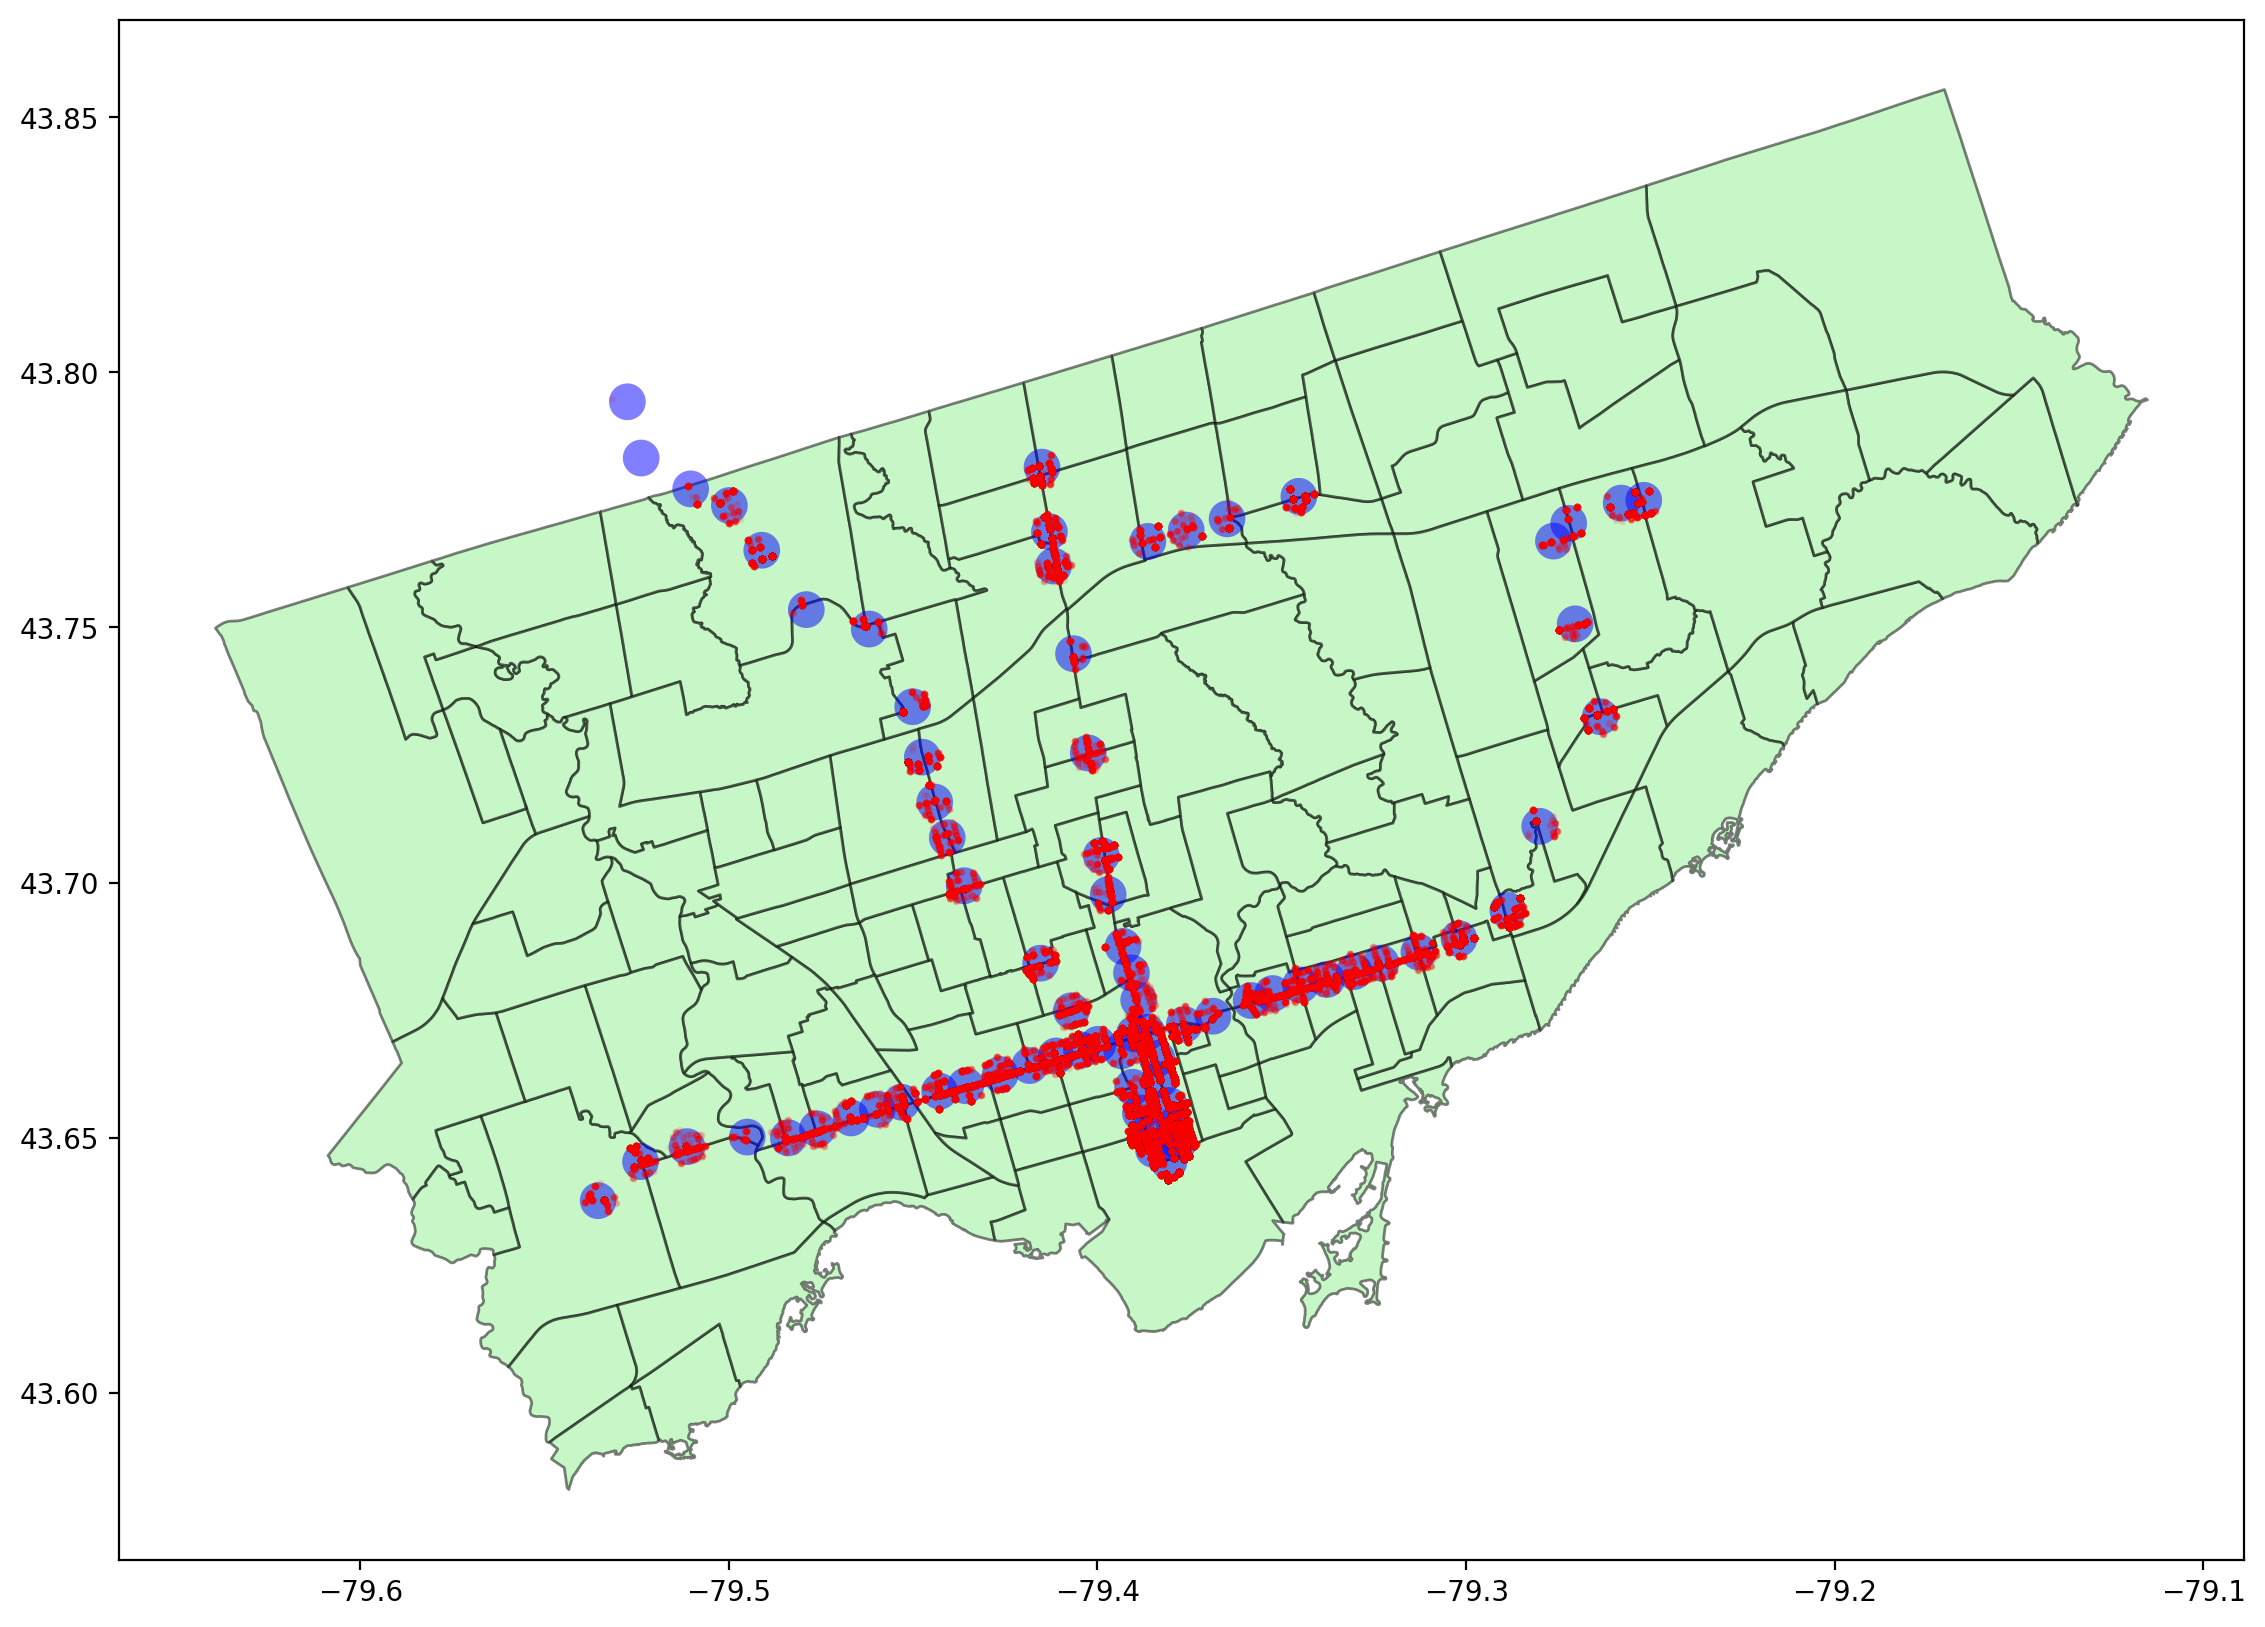

In [40]:
ax = neighbourhoods.plot(color = 'lightgreen', edgecolor = 'black', alpha = 0.5)
stations_area.plot(ax=ax, color = 'blue', markersize = 3, alpha = 0.5)
crime_around_stations.plot(ax=ax, color = 'red', markersize = 3, alpha = 0.1)

In [42]:
crime_around_stations.groupby('station').size().sort_values(ascending=False)

station
dundas                         5304
college                        3892
queen                          3784
wellesley                      3213
bloor yonge                    2682
                               ... 
ellesmere                        87
old mill                         64
pioneer village                  60
downsview park                   53
vaughan metropolitan centre       1
Length: 74, dtype: int64